In [62]:
%matplotlib inline
import matplotlib
import seaborn as sns
import quandl
import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
from ipywidgets import interact
from matplotlib import rcParams
plt.rcParams['figure.figsize'] = (15, 10)
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

In [58]:
# To really use the Quandl API. Limited usage doesn't require authtoken.

authtoken = None
# authtoken = "your token here"

def get_quandl(what):
    """ 
    Wrapper around Quandl requests, using authtoken only if available
    """
    if authtoken:
        return quandl.get(what, authtoken=authtoken)
    else:
        return quandl.get(what, start_date="2013-01-31", end_date="2015-12-31")

In [59]:
oil = get_quandl("DOE/RWTC") # This creates pandas data frame

In [60]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=20)
    rolstd = pd.rolling_std(timeseries, window=20)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

/Users/sarthakdasadia/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  """
/Users/sarthakdasadia/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()
  


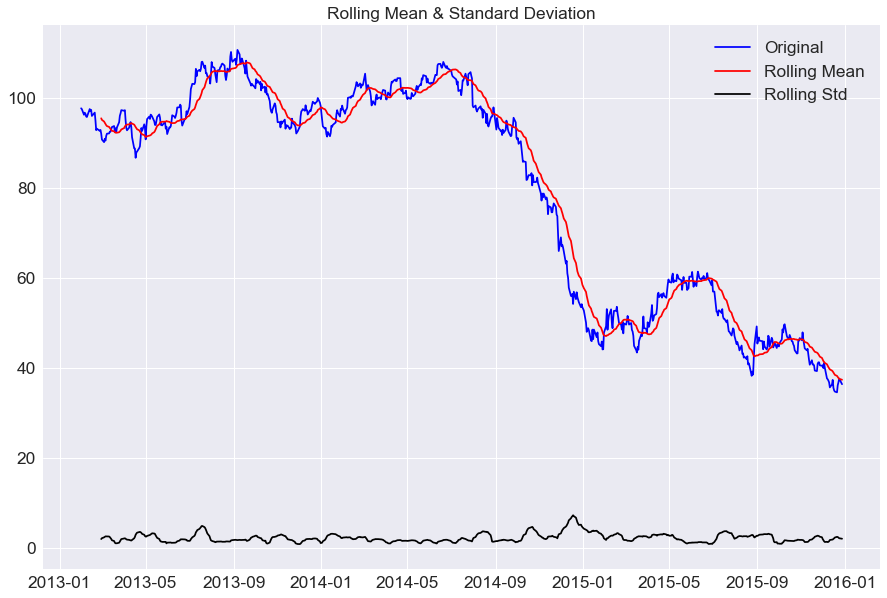

Results of Dickey-Fuller Test:
Test Statistic                   0.290844
p-value                          0.976920
#Lags Used                       1.000000
Number of Observations Used    736.000000
Critical Value (5%)             -2.865475
Critical Value (1%)             -3.439266
Critical Value (10%)            -2.568865
dtype: float64


In [63]:
test_stationarity(oil['Value'])

In [83]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(oil.Value, order=(2, 1, 3))  
results_ARIMA = model.fit(disp=-1)  

In [84]:
arima_pred = results_ARIMA.predict(oil['Value'].index[500], oil['Value'].index[-1], typ="levels")

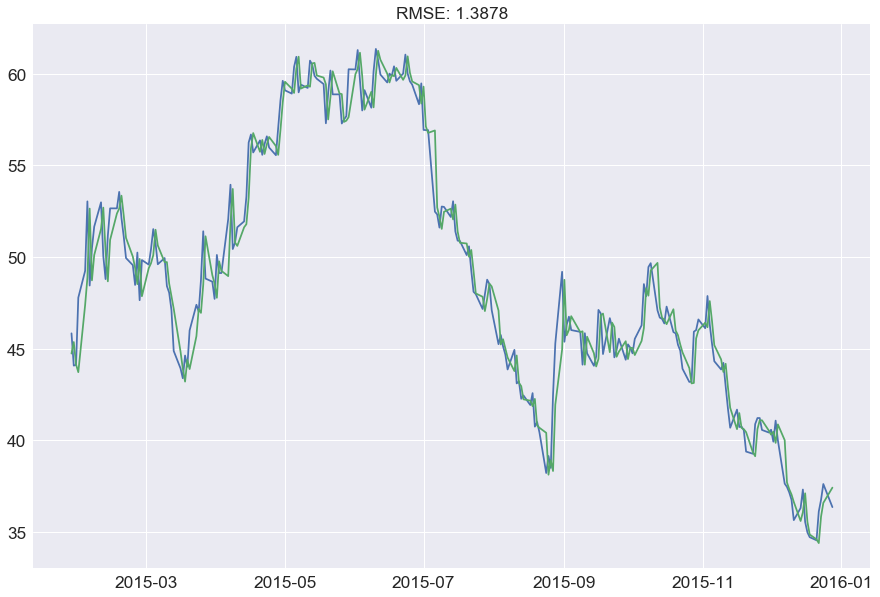

In [85]:
predictions_ARIMA = arima_pred
plt.plot(oil.Value[500:])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-oil.Value[500:])**2)/len(oil.Value[500:])))

In [45]:
len(arima_pred)

238